In [1]:
import sys
import numpy as np
sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )
sys.path.append('/project/projectdirs/metatlas/projects/ms_monitor_tools')
# import metatlas_get_data_helper_fun as ma_data
from metatlas import metatlas_objects as metob
from metatlas import h5_query as h5q
from matplotlib import pyplot as plt
%matplotlib inline

('Metatlas live in ', '/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages/metatlas')
you're running on 072ec0638adb at 172.17.0.4 


In [2]:
files = metob.retrieve('Lcmsruns',name = '%variabil%fps%')
# files = metob.retrieve('Lcmsruns',name = '%20160223_pHILIC___FPS_MSMS_KBL_Qex_QCMix_Ver2_____Run50%')
# files = metob.retrieve('Lcmsruns',name = '%20151016_pHILIC___POS_MSMS_KZ_RootExu_6wk_1_of_4_MeOHExt__Run13%')
for f in files:
    print f.name

Mvariabilis_FPS.mzML


In [3]:
rt,intensity = h5q.get_chromatogram(files[0].hdf5_file, 0, 1000, polarity = 1, ms_level = 1)

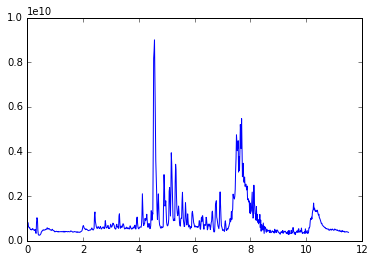

In [4]:
plt.plot(rt,intensity)
plt.show()


In [5]:
data = h5q.get_data(files[0].hdf5_file,ms_level = 1,polarity = 1)

In [6]:
data.dtype
np.save('sparse_data.npy',data)

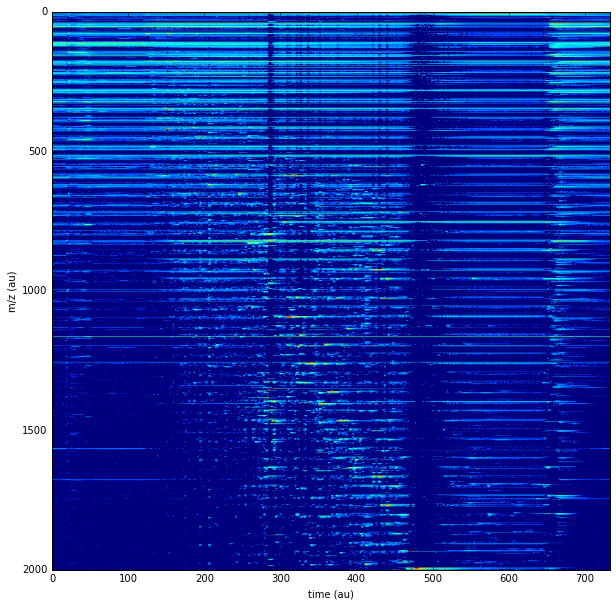

In [7]:
import numpy as np
mzEdges = np.linspace(100, 600,2000)

hMap = h5q.get_heatmap(files[0].hdf5_file,mzEdges,ms_level=1,polarity=1)#,min_rt = 2,max_rt = 8)
fig = plt.figure(figsize=(10,10))
plt.imshow((hMap['arr']+1)**0.125,aspect='auto')
plt.xlabel('time (au)')
plt.ylabel('m/z (au)')
plt.show()
fig.savefig('course_heatmap.png')